In [ ]:
import pandas as pd
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Dense, Input,Flatten,Embedding,Dropout
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization ,Conv2D,Conv1D,MaxPooling1D,Flatten, Softmax, LSTM,SimpleRNN,GRU
from tensorflow.keras import layers
from keras.models import Model
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error



nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_excel('data3.xlsx')
df

,Unnamed: 0,Head_line,Date
0,0,Bitcoin survives despite all China can throw a...,- 21 hours ago
1,1,The Last Trading Day of the First Half of 2021...,"- Jun 30, 2021"
2,2,Global shares fall on pandemic fears ahead of ...,"- Jun 30, 2021"
3,3,Gold Records Worst Monthly Loss in Five Years ...,"- Jun 30, 2021"
4,4,Shield Against Volatile Gold Prices with Two M...,"- Jun 30, 2021"
...,...,...,...
19922,19922,"US STOCKS-Wall St flat, but commodity shares gain","- Apr 08, 2011"
19923,19923,European shares close up ahead of U.S. earnings,"- Apr 08, 2011"
19924,19924,"US STOCKS-Wall St ekes out gain, chases commod...","- Apr 08, 2011"
19925,19925,"GLOBAL MARKETS-Oil hits 32-month peak, euro ga...","- Apr 08, 2011"


In [ ]:
df = df.groupby(['Date'])['Head_line'].apply(','.join).reset_index()
df.drop(0,inplace=True)

In [ ]:
df1 = pd.read_csv('/content/Gold Futures Historical Data.csv')
df1

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 02, 2021","1,778.20","1,775.80","1,780.25","1,774.55",-,0.08%
1,"Jul 01, 2021","1,776.80","1,770.80","1,783.40","1,765.90",171.44K,0.29%
2,"Jun 30, 2021","1,771.60","1,761.90","1,774.70","1,753.20",177.89K,0.45%
3,"Jun 29, 2021","1,763.60","1,778.80","1,779.20","1,750.10",239.91K,-0.96%
4,"Jun 28, 2021","1,780.70","1,782.00","1,786.10","1,770.40",160.79K,0.16%
...,...,...,...,...,...,...,...
2737,"Jan 07, 2011","1,368.50","1,372.70","1,377.20","1,355.50",0.23K,-0.21%
2738,"Jan 06, 2011","1,371.40","1,374.80","1,376.50","1,368.90",0.16K,-0.15%
2739,"Jan 05, 2011","1,373.40","1,383.40","1,384.00","1,364.20",0.18K,-0.37%
2740,"Jan 04, 2011","1,378.50","1,409.60","1,410.90","1,375.80",0.12K,-3.10%


In [ ]:
df1['Future'] = df1['Price'].shift(-1)
df1.dropna(inplace=True)
def compare(current, future):
    if future > current:
        return 1
    else:
        return 0
df1['target'] = list(map(compare, df1['Price'], df1['Future']))
df1

,Date,Price,Open,High,Low,Vol.,Change %,Future,target
0,"Jul 02, 2021","1,778.20","1,775.80","1,780.25","1,774.55",-,0.08%,"1,776.80",0
1,"Jul 01, 2021","1,776.80","1,770.80","1,783.40","1,765.90",171.44K,0.29%,"1,771.60",0
2,"Jun 30, 2021","1,771.60","1,761.90","1,774.70","1,753.20",177.89K,0.45%,"1,763.60",0
3,"Jun 29, 2021","1,763.60","1,778.80","1,779.20","1,750.10",239.91K,-0.96%,"1,780.70",1
4,"Jun 28, 2021","1,780.70","1,782.00","1,786.10","1,770.40",160.79K,0.16%,"1,777.80",0
...,...,...,...,...,...,...,...,...,...
2736,"Jan 10, 2011","1,373.70","1,369.00","1,374.00","1,365.70",0.18K,0.38%,"1,368.50",0
2737,"Jan 07, 2011","1,368.50","1,372.70","1,377.20","1,355.50",0.23K,-0.21%,"1,371.40",1
2738,"Jan 06, 2011","1,371.40","1,374.80","1,376.50","1,368.90",0.16K,-0.15%,"1,373.40",1
2739,"Jan 05, 2011","1,373.40","1,383.40","1,384.00","1,364.20",0.18K,-0.37%,"1,378.50",1


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df1['Date'] = pd.to_datetime(df1["Date"])


In [ ]:
# df['Head_line'] = df['Head_line'].str.replace('\d+', '')
# df['Head_line'] = df['Head_line'].str.replace('’', '')

df


,Date,Head_line
1,2012-04-01,Gold climbs as investors ditch dollar on China...
2,2013-04-01,Gold prices rise as U.S. manufacturing index s...
3,2014-04-01,Gold prices up in early Asia trade in cautious...
4,2015-04-01,Gold prices down in early Asia as focus turns ...
5,2016-04-01,CFTC - Commitments of Traders - No Major Chang...
...,...,...
3208,2014-09-30,Gold prices ease in Asia as investors watch do...
3209,2015-09-30,"Gold prices mostly flat in Asia as China, othe..."
3210,2016-09-30,Chicago PMI rises more than expected in Septem...
3211,2019-09-30,Gold Plummets as Palladium Returns Atop Precio...


In [ ]:
df_n = df.set_index('Date').join(df1.set_index('Date'))

In [ ]:
df_n.dropna(inplace=True)
df_n.isna().sum()

Head_line    0
Price        0
Open         0
High         0
Low          0
Vol.         0
Change %     0
Future       0
target       0
dtype: int64

In [ ]:
df_n.sort_index(inplace=True)
df_n

,Head_line,Price,Open,High,Low,Vol.,Change %,Future,target
Date,,,,,,,,,
2011-04-08,"US STOCKS-Market falls in late sell-off, volum...","1,473.40","1,457.60","1,475.50","1,457.50",1.41K,1.02%,"1,458.50",0.0
2011-04-11,"PRECIOUS-Gold falls nearly 1 pct on oil, silve...","1,467.40","1,476.00","1,476.00","1,459.70",0.38K,-0.41%,"1,473.40",1.0
2011-04-12,PRECIOUS-Gold regains strength after fall; ETF...,"1,452.90","1,461.80","1,467.20","1,444.40",0.35K,-0.99%,"1,467.40",1.0
2011-04-13,UPDATE 10-Glencore seeks up to $12.1 bln in IP...,"1,454.90","1,455.00","1,462.00","1,454.00",0.20K,0.14%,"1,452.90",0.0
2011-04-14,"PRECIOUS-Gold hits record on weak dollar, Chin...","1,471.70","1,456.80","1,476.00","1,452.70",0.54K,1.15%,"1,454.90",0.0
...,...,...,...,...,...,...,...,...,...
2021-06-24,Melt-Up in U.S. Equities as President Announce...,"1,776.70","1,778.20","1,788.60","1,772.70",152.23K,-0.38%,"1,783.40",1.0
2021-06-25,PCE Inflation Gauge Rising to 2008 Levels Take...,"1,777.80","1,775.70","1,791.00","1,773.60",161.20K,0.06%,"1,776.70",0.0
2021-06-28,Gold Heads for Worst Month Since 2016 on Fed’s...,"1,780.70","1,782.00","1,786.10","1,770.40",160.79K,0.16%,"1,777.80",0.0


In [ ]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"won’t": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}



In [ ]:
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters and format the text to create fewer nulls word embeddings'''

    # Convert words to lower case
    text = text.lower()

    # Replace contractions with their longer forms
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)

    # Format words and remove unwanted characters
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'0,0', '00', text)
    text = re.sub(r'[_"\-;%()|.,+&=*%.,!?:#@\[\]]', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\$', ' $ ', text)
    text = re.sub(r'u s ', ' united states ', text)
    text = re.sub(r'u n ', ' united nations ', text)
    text = re.sub(r'u k ', ' united kingdom ', text)
    text = re.sub(r'j k ', ' jk ', text)
    text = re.sub(r' s ', ' ', text)
    text = re.sub(r' yr ', ' year ', text)
    text = re.sub(r' l g b t ', ' lgbt ', text)
    text = re.sub(r'0km ', '0 km ', text)

    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [ ]:
headlines = df_n['Head_line']
headlines

Date
2011-04-08    US STOCKS-Market falls in late sell-off, volum...
2011-04-11    PRECIOUS-Gold falls nearly 1 pct on oil, silve...
2011-04-12    PRECIOUS-Gold regains strength after fall; ETF...
2011-04-13    UPDATE 10-Glencore seeks up to $12.1 bln in IP...
2011-04-14    PRECIOUS-Gold hits record on weak dollar, Chin...
                                    ...                        
2021-06-24    Melt-Up in U.S. Equities as President Announce...
2021-06-25    PCE Inflation Gauge Rising to 2008 Levels Take...
2021-06-28    Gold Heads for Worst Month Since 2016 on Fed’s...
2021-06-29    Gold Heads for Worst Month Since 2016 on Dolla...
2021-06-30    The Last Trading Day of the First Half of 2021...
Name: Head_line, Length: 2658, dtype: object

In [ ]:
# Clean the headlines
clean_headlines = []

for daily_headlines in headlines:
    clean_daily_headlines = []
    clean_daily_headlines.append(clean_text(daily_headlines))
    # for headline in daily_headlines:

    #     print(headline)
    clean_headlines.append(clean_daily_headlines)

In [ ]:
clean_headlines[2]

['precious gold regains strength fall etf holdings slip global markets yen weakens oil resumes climb risk sought nymex crude extends falls 3rd day demand concerns precious gold regains strength fall etfs slip global markets oil slumps growth worries stocks drop us stocks energy drives wall st lower alcoa results drag grains tumble month goldman japan us stocks wall st falls oil prices alcoa results drag global markets world stocks oil prices slump global growth concerns spark ftse retreat grains markets plunge investors cash corn sinks us stocks wall st drops 1 pct oil fall alcoa revenue dollar drops majors japan woes earnings doubts spur europe stock slide forex yen swiss franc rise broadly euro hits 15 mo high global markets goldman forces oil retreat hitting stocks us stocks wall st tumbles 1 pct oil drop alcoa revenue global markets stocks commodities slump economic worries 0rpt special report united states china start cold war 0rpt special report united states china start cold war

In [ ]:
df_n['Head_line'] = [','.join(map(str, l)) for l in clean_headlines]
df_n.to_excel('final_data_oil.xlsx')


In [ ]:
train_text = df_n['Head_line']
WORD_NUM = 5000
tokenizer = Tokenizer(num_words = WORD_NUM, lower= True)
tokenizer.fit_on_texts(train_text)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1  # number of unique words plus "0"(use for padding)
vocab_size

6389

In [ ]:
dict(list(word_index.items())[:10])

{'dollar': 9,
 'futures': 5,
 'gold': 1,
 'higher': 8,
 'lower': 10,
 'prices': 7,
 'states': 4,
 'stocks': 2,
 'trade': 6,
 'united': 3}

In [ ]:
train_seq = tokenizer.texts_to_sequences(train_text)
print(train_seq[1])

[61, 1, 33, 495, 14, 291, 30, 43, 575, 57, 400, 858, 1665, 2752, 3614, 21, 3615, 1198, 1198, 6, 18, 19, 115, 3616, 30, 162, 92, 292, 320, 61, 1, 33, 89, 43, 575, 57, 400, 299, 14, 2753, 1138, 175, 211, 3617, 565, 73, 258, 203, 858, 1199, 268, 2278, 816, 715, 74, 39, 1806, 2754, 18, 19, 30, 100, 70, 640, 1424, 2, 18, 19, 30, 212, 70, 103, 2, 113, 55, 2, 19, 35, 75, 524, 515, 496, 61, 1, 43, 354, 59, 1047, 257, 18, 19, 30, 33, 1424, 114, 112, 2, 110, 23, 331, 1140, 37, 15, 400, 3618, 3619, 3620, 2755, 1260, 18, 19, 30, 31, 1424, 2, 71, 9, 292, 24, 597, 1667, 296, 681, 2279, 292, 9, 20, 682, 1668, 296, 681, 2279, 292, 9, 20, 682, 1668, 1199, 268, 2278, 816, 715, 74, 39, 1806, 2754, 55, 2, 5, 64, 75, 179, 318, 327, 132, 2756, 69, 75, 112, 55, 2, 5, 48, 75, 53, 46, 91, 170, 1807, 346, 35, 194, 220, 507, 21, 2, 1539, 22, 716, 717, 449, 837, 61, 1, 43, 354, 59, 1047, 257, 132, 87, 8, 318, 146, 2756, 1048, 18, 19, 41, 102, 1261, 40, 345, 2, 139, 21, 91, 1539, 22, 911, 449, 837, 61, 1, 79, 89, 

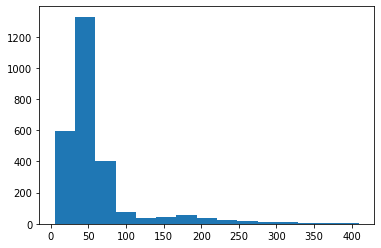

In [ ]:
p=[len(s) for s in train_seq]
plt.hist(p, bins=15)
plt.show()

In [ ]:
maxlen= 60
train_pad = pad_sequences(train_seq, maxlen= maxlen, padding='post', truncating='post')
print(train_pad.shape)

(2658, 60)


In [ ]:
train_pad[200]

array([  1,  93,   9, 346,  40, 166,   1,   8, 153, 252,   1,   5,  45,
       169,  15,  22,   6, 303, 953,  23,   5, 127, 144,  56, 238, 464,
         1,   5, 108, 120,  15,  22, 144,  56, 238,  53,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [ ]:
csv =pd.DataFrame(train_pad)
csv

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,55,2,50,33,937,377,1664,857,18,19,257,30,191,2751,55,9,212,386,1995,56,58,187,539,1138,32,14,26,57,22,110,23,331,51,938,73,639,55,2,29,263,33,1095,3611,2,1665,299,14,540,20,391,30,1803,1538,55,2,29,263,71,51,1666
1,61,1,33,495,14,291,30,43,575,57,400,858,1665,2752,3614,21,3615,1198,1198,6,18,19,115,3616,30,162,92,292,320,61,1,33,89,43,575,57,400,299,14,2753,1138,175,211,3617,565,73,258,203,858,1199,268,2278,816,715,74,39,1806,2754,18,19
2,61,1,683,300,35,423,1540,113,18,19,292,284,30,912,241,115,1541,1425,257,162,33,778,68,70,76,61,1,683,300,35,541,113,18,19,30,212,96,103,2,92,55,2,515,1262,29,263,10,1542,221,913,1096,217,28,525,297,55,2,29,263,33
3,299,224,1427,1669,355,14,1997,1336,1670,888,477,292,44,736,9,181,3,4,41,203,18,19,123,2,135,1671,117,1544,61,1,162,20,139,9,423,1540,113,477,9,118,39,526,28,27,3,4,41,203,31,55,2,29,263,3621,249,250,859,18,19,718
4,61,1,79,89,84,9,21,73,13,61,1,79,89,84,9,43,575,57,63,838,18,19,2,780,315,147,92,28,61,1,79,1546,22,9,43,575,57,63,858,55,2,153,171,1673,29,263,96,2759,18,19,96,103,130,2,3,4,9,18,19,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,2122,3,4,294,1167,900,1529,128,1431,1,1654,3563,1167,211,88,2643,1,1686,3554,1155,18,91,64,1529,424,58,13,327,215,1031,1,1832,38,3517,73,2072,1,608,1115,156,187,1197,780,1050,1,50,1,42,223,38,7,700,9,141,531,1,1787,587,515,1660
2654,884,73,1880,239,2052,845,449,1,8,18,2,797,89,59,30,240,1205,15,1,460,315,147,64,138,569,14,361,1042,187,746,30,45,136,488,67,1,54,88,212,1,42,223,38,7,700,295,319,884,69,362,242,2197,963,1,648,508,3603,1145,110,2
2655,1,500,439,28,138,1041,593,545,1246,1,1727,833,2267,1731,941,195,68,88,299,41,633,3059,909,597,1,18,91,628,104,59,3,4,294,19,1193,351,1977,1260,444,423,2693,1,2123,2022,1063,88,1408,1,42,223,38,7,700,95,3,4,72,1,5,797
2656,1,500,439,28,138,1041,9,300,11,18,91,48,10,104,196,264,3328,25,1,100,3,4,262,2453,143,543,592,1993,88,16,878,213,42,1,206,99,74,38,1007,1508,1246,676,151,55,58,13,1,180,335,138,822,310,9,300,545,11,1,79,310,60


In [ ]:
csv.to_excel('W2V_oil.xlsx')

In [ ]:
smote = SMOTE(random_state=100)
X, y = smote.fit_sample(train_pad, df_n['target'])
df_n['target'].value_counts()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.0    1362
1.0    1296
Name: target, dtype: int64

In [ ]:
y.shape

(2724,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


# **CNN**

In [ ]:
embedding_dim = 30

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(Conv1D(30,5))
model.add(MaxPooling1D())
model.add(Softmax())
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 60, 30)            191670    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 56, 30)            4530      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 28, 30)            0         
_________________________________________________________________
softmax_8 (Softmax)          (None, 28, 30)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 840)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               107648    
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit([X_train], y_train,epochs=20,batch_size=15
               ,validation_data=([X_test ],y_test))

Epoch 1/20
122/122 [==============================] - 2s 8ms/step - loss: 0.6936 - accuracy: 0.4751 - val_loss: 0.6932 - val_accuracy: 0.4983
Epoch 2/20
122/122 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.4926 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 3/20
122/122 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.4860 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 4/20
122/122 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.4932 - val_loss: 0.6932 - val_accuracy: 0.4983
Epoch 5/20
122/122 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.4983
Epoch 6/20
122/122 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.4964 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 7/20
122/122 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.4926 - val_loss: 0.6931 - val_accuracy: 0.4983
Epoch 

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training Accuracy: 1.0000
Testing Accuracy:  0.6218


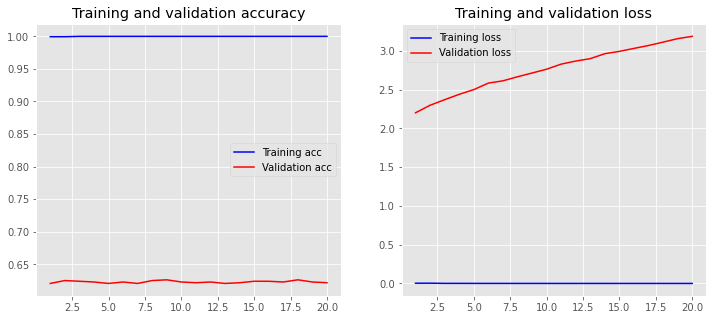

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=15)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss1, accuracy1 = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy1))
plot_history(history)

In [ ]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

15/15 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       451
         1.0       0.00      0.00      0.00       448

    accuracy                           0.50       899
   macro avg       0.25      0.50      0.33       899
weighted avg       0.25      0.50      0.34       899



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mean_squared_error(y_test, y_pred_bool)

0.4983314794215795

In [ ]:
rmse = mean_squared_error(y_test, y_pred_bool, squared=False)
rmse

0.7059259730464515

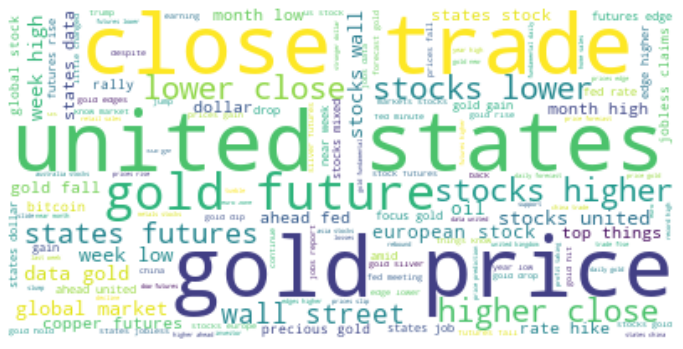

In [ ]:
# for index , row in df_n.iterrows():
#   text.(row['Head_line'])
text = ' '.join(df_n['Head_line'])
wc = WordCloud(background_color="white", repeat=True)
wc.generate(text)
plt.figure(figsize = (12,12))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()


# LSTM

In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(LSTM(128))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 60, 50)            319450    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               91648     
_________________________________________________________________
flatten_8 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 428,911
Trainable params: 428,911
Non-trainable params: 0
_______________________________________________

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit([X_train], y_train,epochs=20,batch_size=15
               ,validation_data=([X_test ],y_test))

Epoch 1/20
122/122 [==============================] - 4s 16ms/step - loss: 0.6933 - accuracy: 0.4871 - val_loss: 0.6931 - val_accuracy: 0.4983
Epoch 2/20
122/122 [==============================] - 1s 12ms/step - loss: 0.6938 - accuracy: 0.4915 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 3/20
122/122 [==============================] - 1s 12ms/step - loss: 0.6928 - accuracy: 0.5063 - val_loss: 0.6925 - val_accuracy: 0.5006
Epoch 4/20
122/122 [==============================] - 2s 12ms/step - loss: 0.6770 - accuracy: 0.5430 - val_loss: 0.7019 - val_accuracy: 0.4994
Epoch 5/20
122/122 [==============================] - 1s 12ms/step - loss: 0.6215 - accuracy: 0.5885 - val_loss: 0.7640 - val_accuracy: 0.5128
Epoch 6/20
122/122 [==============================] - 2s 13ms/step - loss: 0.5871 - accuracy: 0.6033 - val_loss: 0.8100 - val_accuracy: 0.4994
Epoch 7/20
122/122 [==============================] - 2s 13ms/step - loss: 0.5282 - accuracy: 0.6405 - val_loss: 0.9407 - val_accuracy: 0.5161

In [ ]:
y_pred_l = model.predict(X_test, batch_size=64, verbose=1)
y_pred_LSTM = np.argmax(y_pred_l, axis=1)

print(classification_report(y_test, y_pred_LSTM))

15/15 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       451
         1.0       0.00      0.00      0.00       448

    accuracy                           0.50       899
   macro avg       0.25      0.50      0.33       899
weighted avg       0.25      0.50      0.34       899



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mean_squared_error(y_test, y_pred_LSTM)

0.4983314794215795

In [ ]:
rmse = mean_squared_error(y_test, y_pred_LSTM, squared=False)
rmse

0.7059259730464515

## GRU

In [ ]:
embedding_dim = 30

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(Conv1D(30,5))
model.add(MaxPooling1D())
model.add(Softmax())
model.add(GRU(64))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 60, 30)            191670    
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 56, 30)            4530      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 28, 30)            0         
_________________________________________________________________
softmax_10 (Softmax)         (None, 28, 30)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                18432     
_________________________________________________________________
flatten_9 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)             

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit([X_train], y_train,epochs=20,batch_size=15
               ,validation_data=([X_test ],y_test))

Epoch 1/20
122/122 [==============================] - 3s 12ms/step - loss: 0.6935 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 2/20
122/122 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.4723 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 3/20
122/122 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.4827 - val_loss: 0.6931 - val_accuracy: 0.4983
Epoch 4/20
122/122 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.4822 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 5/20
122/122 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6932 - val_accuracy: 0.4983
Epoch 6/20
122/122 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.4827 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 7/20
122/122 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch

In [ ]:
y_pred_GRU = model.predict(X_test, batch_size=64, verbose=1)
y_pred_GRU = np.argmax(y_pred_GRU, axis=1)

print(classification_report(y_test, y_pred_GRU))

15/15 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       451
         1.0       0.00      0.00      0.00       448

    accuracy                           0.50       899
   macro avg       0.25      0.50      0.33       899
weighted avg       0.25      0.50      0.34       899



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mean_squared_error(y_test, y_pred_GRU)

0.4983314794215795

In [ ]:
rmse = mean_squared_error(y_test, y_pred_GRU, squared=False)
rmse

0.7059259730464515

## RNN

In [ ]:
embedding_dim = 30

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(Conv1D(30,5))
model.add(MaxPooling1D())
model.add(Softmax())
model.add(SimpleRNN(units= 64))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 60, 30)            191670    
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 56, 30)            4530      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 28, 30)            0         
_________________________________________________________________
softmax_11 (Softmax)         (None, 28, 30)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                6080      
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)             

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit([X_train], y_train,epochs=20,batch_size=15
               ,validation_data=([X_test ],y_test))

Epoch 1/20
122/122 [==============================] - 5s 32ms/step - loss: 0.6935 - accuracy: 0.4756 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 2/20
122/122 [==============================] - 4s 32ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 3/20
122/122 [==============================] - 4s 32ms/step - loss: 0.6932 - accuracy: 0.4855 - val_loss: 0.6932 - val_accuracy: 0.4983
Epoch 4/20
122/122 [==============================] - 4s 32ms/step - loss: 0.6932 - accuracy: 0.4882 - val_loss: 0.6932 - val_accuracy: 0.4983
Epoch 5/20
122/122 [==============================] - 4s 32ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.4983
Epoch 6/20
122/122 [==============================] - 4s 32ms/step - loss: 0.6932 - accuracy: 0.4729 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 7/20
122/122 [==============================] - 4s 32ms/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.4983

In [ ]:
y_pred_RNN = model.predict(X_test, batch_size=64, verbose=1)
y_pred_RNN = np.argmax(y_pred_RNN, axis=1)

print(classification_report(y_test, y_pred_RNN))

15/15 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       451
         1.0       0.00      0.00      0.00       448

    accuracy                           0.50       899
   macro avg       0.25      0.50      0.33       899
weighted avg       0.25      0.50      0.34       899



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mean_squared_error(y_test, y_pred_RNN)

0.4983314794215795

In [ ]:
rmse = mean_squared_error(y_test, y_pred_RNN, squared=False)
rmse

0.7059259730464515

# SVM

In [ ]:
from sklearn.svm import SVC


In [ ]:
svm=SVC(C=10, kernel='rbf',gamma=0.01, probability=True)
svm.fit (X_train,y_train )
y_pr_svm = svm.predict (X_test)
print (classification_report(y_test,y_pr_svm))

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       451
         1.0       1.00      0.00      0.00       448

    accuracy                           0.50       899
   macro avg       0.75      0.50      0.34       899
weighted avg       0.75      0.50      0.34       899



In [ ]:
mean_squared_error(y_test, y_pr_svm)

0.5116796440489433

In [ ]:
rmse = mean_squared_error(y_test, y_pr_svm, squared=False)
rmse

0.7153178622465284

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pr_rf = clf.predict (X_test)
print (classification_report(y_test,y_pr_rf))

              precision    recall  f1-score   support

         0.0       0.50      0.65      0.56       438
         1.0       0.53      0.38      0.44       461

    accuracy                           0.51       899
   macro avg       0.51      0.51      0.50       899
weighted avg       0.51      0.51      0.50       899



In [ ]:
mean_squared_error(y_test, y_pr_rf)

0.4916573971078977

In [ ]:
rmse = mean_squared_error(y_test, y_pr_rf, squared=False)
rmse

0.7011828556859456